In [53]:
%load_ext lab_black

from puzzles import load_lines

import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [64]:
!rm -rf 8_animation/
!mkdir 8_animation

In [65]:
A = np.zeros([6, 50], dtype=np.uint8)


def rect(A, *args):
    w, h = args[0].split("x")
    w, h = int(w), int(h)
    A[:h, :w] = 1


def rotate(A, *args):
    row_col, num, shift = args[0], args[1], args[-1]
    num, shift = int(num.split("=")[1]), int(shift)
    if row_col == "row":
        shift = shift % A.shape[1]
        A[num] = np.concatenate([A[num][-shift:], A[num][:-shift]])
    else:
        shift = shift % A.shape[0]
        A[:, num] = np.concatenate(
            [A[:, num][-shift:].ravel(), A[:, num][:-shift].ravel()]
        )


funcs = {"rect": rect, "rotate": rotate}

for i, cmd in tqdm(enumerate(load_lines(8)), total=len(load_lines(8))):
    func, *args = cmd.split()
    funcs[func](A, *args)

    plt.imshow(A)
    plt.savefig(f"8_animation/{i:03d}.png")
    plt.tight_layout(pad=0)
    plt.close()


100%|█████████████████████████████████████████| 193/193 [00:18<00:00, 10.56it/s]


In [66]:
A.sum()

119

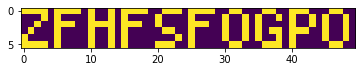

In [67]:
plt.imshow(A)

In [74]:
from pathlib import Path


def make_gif(folder, duration):
    folder = Path(folder)
    paths = sorted(folder.glob("*.jpg")) + sorted(folder.glob("*.png"))
    img, *imgs = [Image.open(f) for f in paths]
    img.save(
        fp=f"{folder.stem}.gif",
        format="GIF",
        append_images=imgs,
        save_all=True,
        duration=duration,
        loop=0,
    )

In [75]:
make_gif("8_animation", 120)

In [69]:
import glob
from PIL import Image

# filepaths
fp_in = "8_animation/*.png"
fp_out = "8.gif"

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(
    fp=fp_out, format="GIF", append_images=imgs, save_all=True, duration=120, loop=0
)